In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
import statistics as st
import missingno as msno
%matplotlib inline

In [2]:
train = pd.read_excel('XY_train.xlsx')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


# Part 1 - Exploratory data analysis

### city

In [3]:
train['city'].value_counts()

city_103    3455
city_21     2123
city_16     1242
city_114    1089
city_160     663
city_136     473
city_67      347
city_75      245
city_102     243
city_104     235
city_73      225
city_100     218
city_71      216
city_11      202
city_90      168
city_61      161
city_28      150
city_23      148
city_65      134
city_36      124
city_173     123
city_50      113
city_83      110
city_162     106
city_46      104
city_116     101
city_19       98
city_45       97
city_138      92
city_149      87
            ... 
city_175      11
city_59       10
city_39        9
city_127       9
city_43        9
city_131       9
city_106       8
city_133       8
city_109       7
city_146       7
city_167       6
city_81        6
city_2         6
city_179       5
city_79        5
city_180       5
city_120       5
city_166       4
city_8         4
city_62        4
city_107       4
city_31        4
city_139       4
city_25        3
city_129       3
city_82        3
city_111       3
city_18       

In [4]:
# 122 cities
train['city'].describe()

count        15326
unique         122
top       city_103
freq          3455
Name: city, dtype: object

### city_development_index

In [5]:
train['city_development_index'].value_counts()

0.920    4118
0.624    2123
0.910    1242
0.926    1089
0.698     564
0.897     473
0.939     395
0.855     347
0.804     243
0.924     235
0.754     225
0.887     218
0.884     216
0.550     202
0.913     161
0.899     148
0.925     139
0.802     134
0.893     124
0.878     123
0.743     113
0.827     113
0.896     113
0.923     110
0.579     107
0.767     106
0.762     104
0.682      98
0.890      97
0.836      92
         ... 
0.725      15
0.448      15
0.739      13
0.640      13
0.556      11
0.493      11
0.563      11
0.775      10
0.680       9
0.745       9
0.898       9
0.516       9
0.742       8
0.701       7
0.735       7
0.730       6
0.788       6
0.921       6
0.780       5
0.512       5
0.487       4
0.807       4
0.518       4
0.649       4
0.645       4
0.693       3
0.824       3
0.625       3
0.781       2
0.664       1
Name: city_development_index, Length: 93, dtype: int64

In [6]:
# 0.448 - 0.949
train['city_development_index'].describe()

count    15326.000000
mean         0.829063
std          0.123161
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

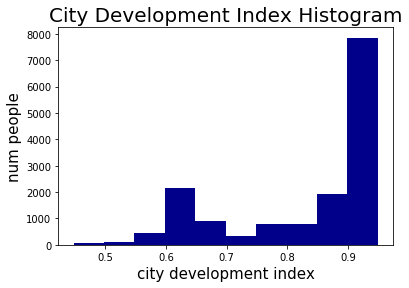

In [7]:
plt.hist(train['city_development_index'], bins=10, color='darkblue')
plt.title("City Development Index Histogram", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('num people', fontsize=15)
# plt.grid()
plt.show()

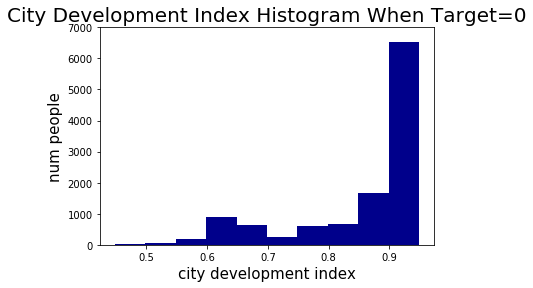

In [8]:
plt.hist(train[train['target']==0]['city_development_index'], bins=10, color='darkblue')
plt.title("City Development Index Histogram When Target=0", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('num people', fontsize=15)
plt.ylim(0, 7000)
# plt.grid()
plt.show()

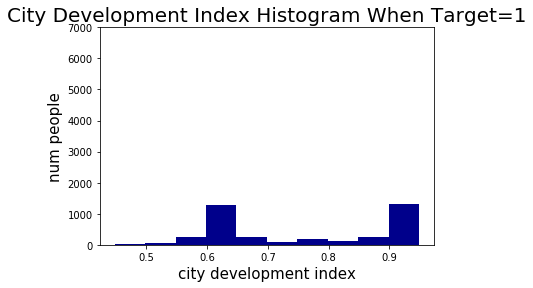

In [9]:
plt.hist(train[train['target']==1]['city_development_index'], bins=10, color='darkblue')
plt.title("City Development Index Histogram When Target=1", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('num people', fontsize=15)
plt.ylim(0, 7000)
# plt.grid()
plt.show()

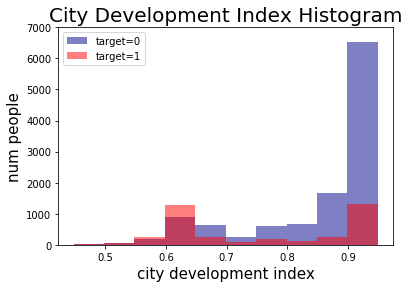

In [10]:
plt.hist(train[train['target']==0]['city_development_index'], bins=10, alpha=0.5, color='darkblue', label="target=0")
plt.hist(train[train['target']==1]['city_development_index'], bins=10, alpha=0.5, color='red', label="target=1")
plt.title("City Development Index Histogram", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('num people', fontsize=15)
plt.ylim(0, 7000)
plt.legend(loc='upper left')
# plt.grid()
plt.show()

In [11]:
train[['city_development_index', 'target']]
dev_and_tar = train.groupby(['city_development_index', 'target']).size()
dev_and_tar = dev_and_tar.to_frame()
dev_and_tar.reset_index(inplace=True) 
dev_and_tar.rename(columns = {list(dev_and_tar)[2]: 'count'}, inplace = True)
dev_and_tar

,city_development_index,target,count
0,0.448,0,4
1,0.448,1,11
2,0.479,0,11
3,0.479,1,12
4,0.487,0,1
5,0.487,1,3
6,0.493,0,5
7,0.493,1,6
8,0.512,0,2
9,0.512,1,3


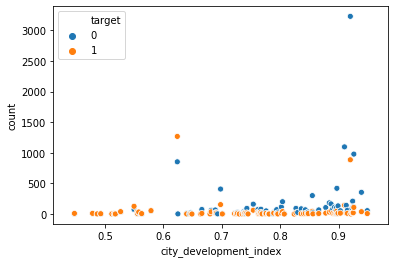

In [12]:
# sns.scatterplot(x='city_development_index', y='count', hue='target', data=dev_and_tar)
# # plt.savefig('file_path.png', bbox_inches='tight')
# plt.show()

### gender

In [13]:
gender_dist = train['gender'].value_counts(dropna=False)
gender_dist

Male      10550
NaN        3639
Female      987
Other       150
Name: gender, dtype: int64

In [14]:
train['gender'].describe()

count     11687
unique        3
top        Male
freq      10550
Name: gender, dtype: object

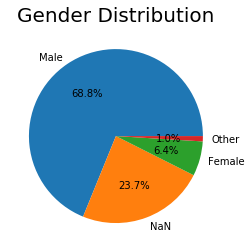

In [15]:
plt.pie(gender_dist, labels=['Male','NaN','Female','Other'], autopct='%1.1f%%')
plt.title("Gender Distribution", fontsize=20)
# plt.legend()
plt.show()

### relevent_experience

In [16]:
relevent_experience_dist = train['relevent_experience'].value_counts(dropna=False)
relevent_experience_dist

Has relevent experience    11064
No relevent experience      4262
Name: relevent_experience, dtype: int64

In [17]:
train['relevent_experience'].describe()

count                       15326
unique                          2
top       Has relevent experience
freq                        11064
Name: relevent_experience, dtype: object

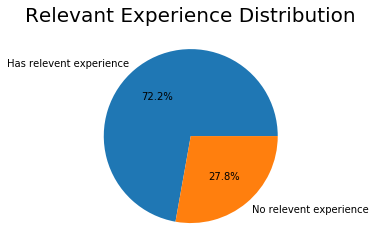

In [18]:
plt.pie(relevent_experience_dist, labels=['Has relevent experience','No relevent experience'], autopct='%1.1f%%')
plt.title("Relevant Experience Distribution", fontsize=20)
plt.show()

### enrolled_university

In [19]:
train['enrolled_university'].value_counts(dropna=False)

no_enrollment       11036
Full time course     3026
Part time course      953
NaN                   311
Name: enrolled_university, dtype: int64

In [20]:
train['enrolled_university'].describe()

count             15015
unique                3
top       no_enrollment
freq              11036
Name: enrolled_university, dtype: object

In [21]:
enr_uni = train['enrolled_university'].value_counts(dropna=False).to_frame()
enr_uni.reset_index(inplace=True) 
enr_uni.rename(columns = {list(enr_uni)[0]: 'enrolled_university', list(enr_uni)[1]: 'count'}, inplace = True)
enr_uni['enrolled_university'].fillna("NaN", inplace=True)
enr_uni

,enrolled_university,count
0,no_enrollment,11036
1,Full time course,3026
2,Part time course,953
3,NaN,311


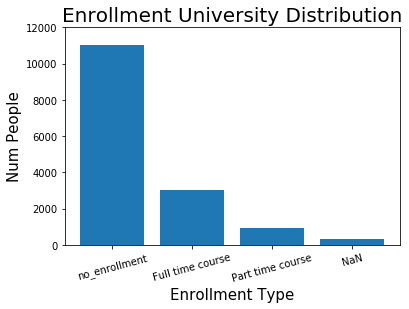

In [22]:
plt.bar(x=enr_uni['enrolled_university'], height=enr_uni['count'])
plt.title("Enrollment University Distribution", fontsize=20)
plt.xlabel('Enrollment Type', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=15)
plt.ylim(0, 12000)
plt.show()

### education_level

In [23]:
train['education_level'].value_counts(dropna=False)

Graduate          9305
Masters           3484
High School       1590
NaN                370
Phd                323
Primary School     254
Name: education_level, dtype: int64

In [24]:
train['education_level'].describe()

count        14956
unique           5
top       Graduate
freq          9305
Name: education_level, dtype: object

In [25]:
edc = train['education_level'].value_counts(dropna=False).to_frame()
edc.reset_index(inplace=True) 
edc.rename(columns = {list(edc)[0]: 'education_level', list(edc)[1]: 'count'}, inplace = True)
edc['education_level'].fillna("NaN", inplace=True)
edc['rank'] = [3,2,4,6,1,5]
edc.sort_values(['rank'], inplace=True)
edc

,education_level,count,rank
4,Phd,323,1
1,Masters,3484,2
0,Graduate,9305,3
2,High School,1590,4
5,Primary School,254,5
3,NaN,370,6


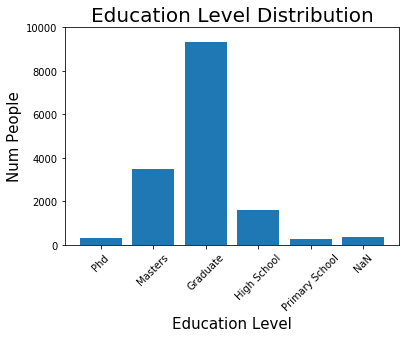

In [26]:
plt.bar(x=edc['education_level'], height=edc['count'])
plt.title("Education Level Distribution", fontsize=20)
plt.xlabel('Education Level', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 10000)
plt.show()

### major_discipline

In [27]:
train['major_discipline'].value_counts(dropna=False)

STEM               11612
NaN                 2237
Humanities           527
Other                295
Business Degree      273
Arts                 204
No Major             178
Name: major_discipline, dtype: int64

In [28]:
train['major_discipline'].describe()

count     13089
unique        6
top        STEM
freq      11612
Name: major_discipline, dtype: object

In [29]:
disc = train['major_discipline'].value_counts(dropna=False).to_frame()
disc.reset_index(inplace=True) 
disc.rename(columns = {list(disc)[0]: 'major_discipline', list(disc)[1]: 'count'}, inplace = True)
disc['major_discipline'].fillna("NaN", inplace=True)
disc

,major_discipline,count
0,STEM,11612
1,NaN,2237
2,Humanities,527
3,Other,295
4,Business Degree,273
5,Arts,204
6,No Major,178


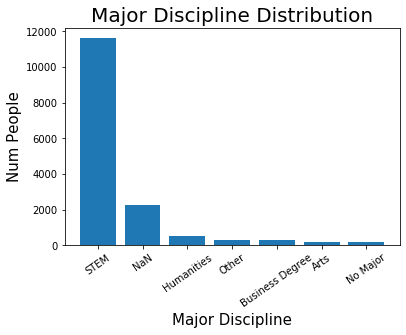

In [30]:
plt.bar(x=disc['major_discipline'], height=disc['count'])
plt.title("Major Discipline Distribution", fontsize=20)
plt.xlabel('Major Discipline', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=35)
# plt.ylim(0, 10000)
plt.show()

### experience

In [31]:
train['experience'].describe()

count     15278
unique       22
top         >20
freq       2620
Name: experience, dtype: object

In [32]:
exp = train['experience'].value_counts(dropna=False).to_frame()
exp.reset_index(inplace=True) 
exp.rename(columns = {list(exp)[0]: 'experience', list(exp)[1]: 'count'}, inplace = True)
exp['experience'].fillna(0, inplace=True) # null = 0 only for presentation
exp['experience'].replace(">20", 21, inplace=True)
exp['experience'].replace("<1", 0.5, inplace=True)
exp.sort_values(['experience'], inplace=True)
exp

,experience,count
22,0.0,48
14,0.5,406
13,1.0,435
5,2.0,889
3,3.0,1084
2,4.0,1097
1,5.0,1161
4,6.0,979
6,7.0,825
9,8.0,636


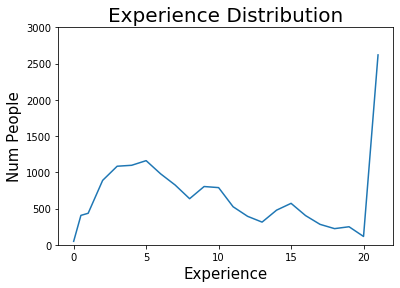

In [33]:
plt.plot(exp['experience'], exp['count'])
plt.title("Experience Distribution", fontsize=20)
plt.xlabel('Experience', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.ylim(0, 3000)
plt.show()

### company_size

In [34]:
train['company_size'].value_counts(dropna=False)

NaN          4779
50-99        2459
100-500      2053
10000+       1613
10-49        1142
1000-4999    1074
<10          1045
500-999       700
5000-9999     461
Name: company_size, dtype: int64

In [35]:
train['company_size'].describe()

count     10547
unique        8
top       50-99
freq       2459
Name: company_size, dtype: object

In [36]:
copm = train['company_size'].value_counts(dropna=False).to_frame()
copm.reset_index(inplace=True) 
copm.rename(columns = {list(copm)[0]: 'company_size', list(copm)[1]: 'count'}, inplace = True)
copm['company_size'].fillna("NaN", inplace=True)
copm['rank'] = [9,3,4,8,2,6,1,5,7]
copm.sort_values(['rank'], inplace=True)
copm

,company_size,count,rank
6,<10,1045,1
4,10-49,1142,2
1,50-99,2459,3
2,100-500,2053,4
7,500-999,700,5
5,1000-4999,1074,6
8,5000-9999,461,7
3,10000+,1613,8
0,NaN,4779,9


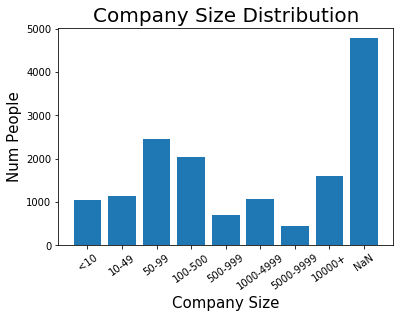

In [37]:
plt.bar(x=copm['company_size'], height=copm['count'])
plt.title("Company Size Distribution", fontsize=20)
plt.xlabel('Company Size', fontsize=15)
plt.ylabel('Num People', fontsize=15)
plt.xticks(rotation=35)
# plt.ylim(0, 10000)
plt.show()

### company_type

In [38]:
comp = train['company_type'].value_counts(dropna=False)
comp

Pvt Ltd                7868
NaN                    4943
Funded Startup          779
Public Sector           750
Early Stage Startup     494
NGO                     392
Other                   100
Name: company_type, dtype: int64

In [39]:
train['company_type'].describe()

count       10383
unique          6
top       Pvt Ltd
freq         7868
Name: company_type, dtype: object

In [40]:
copmt = train['company_type'].value_counts(dropna=False).to_frame()
copmt.reset_index(inplace=True) 
copmt.rename(columns = {list(copmt)[0]: 'company_type', list(copmt)[1]: 'count'}, inplace = True)
copmt['company_type'].fillna("NaN", inplace=True)
copmt

,company_type,count
0,Pvt Ltd,7868
1,NaN,4943
2,Funded Startup,779
3,Public Sector,750
4,Early Stage Startup,494
5,NGO,392
6,Other,100


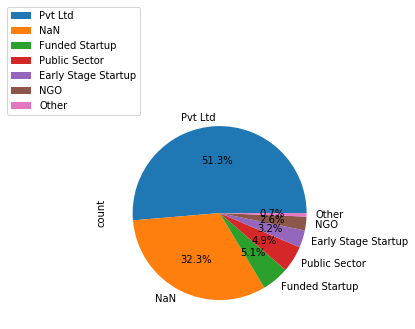

In [41]:
# plt.pie(copmt, labels=['Pvt Ltd', 'NaN', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'], autopct='%1.1f%%')
# plt.title("Company Type Distribution", fontsize=20)
# plt.show()

copmt.plot.pie(y='count', labels=['Pvt Ltd', 'NaN', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'], legend=False, autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(-0.5,1.2))
plt.show()

### last_new_job

In [42]:
train['last_new_job'].value_counts(dropna=False)

1        6487
>4       2612
2        2303
never    1960
4         824
3         808
NaN       332
Name: last_new_job, dtype: int64

In [43]:
train['last_new_job'].describe()

count     14994
unique        6
top           1
freq       6487
Name: last_new_job, dtype: int64

In [44]:
last = train['last_new_job'].value_counts(dropna=False).to_frame()
last.reset_index(inplace=True) 
last.rename(columns = {list(last)[0]: 'last_new_job', list(last)[1]: 'count'}, inplace = True)
last['last_new_job'].fillna("NaN", inplace=True)
last['rank'] = [1,5,2,0,4,3,6]
last.sort_values(['rank'], inplace=True)
last['last_new_job'] = last['last_new_job'].apply(str)
last

,last_new_job,count,rank
3,never,1960,0
0,1,6487,1
2,2,2303,2
5,3,808,3
4,4,824,4
1,>4,2612,5
6,NaN,332,6


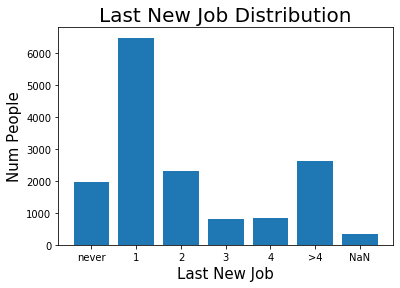

In [45]:
plt.bar(x=last['last_new_job'], height=last['count'])
plt.title("Last New Job Distribution", fontsize=20)
plt.xlabel('Last New Job', fontsize=15)
plt.ylabel('Num People', fontsize=15)
# plt.xticks(rotation=35)
# plt.ylim(0, 10000)
plt.show()

### training_hours

In [46]:
train['training_hours'].value_counts(dropna=False)

28     269
18     232
12     232
22     228
24     226
50     222
17     218
6      216
20     212
34     202
14     201
26     200
10     198
11     198
21     197
48     197
23     197
9      196
56     195
8      186
42     186
15     185
46     183
4      173
32     168
44     167
36     166
25     166
7      161
43     160
      ... 
320      9
262      9
278      9
254      8
336      8
1        8
310      8
260      8
268      8
284      8
306      8
290      7
282      7
324      7
302      7
288      7
228      7
312      7
280      6
276      6
244      6
294      6
266      5
236      5
240      5
270      5
234      4
238      4
272      4
286      3
Name: training_hours, Length: 241, dtype: int64

In [47]:
train['training_hours'].describe()

count    15326.000000
mean        65.337466
std         60.007145
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [48]:
trh = train['training_hours'].value_counts(dropna=False).to_frame()
trh.reset_index(inplace=True) 
trh.rename(columns = {list(trh)[0]: 'training_hours', list(trh)[1]: 'count'}, inplace = True)
trh.sort_values(['training_hours'], inplace=True)
trh

,training_hours,count
216,1,8
74,2,78
59,3,100
23,4,173
67,5,86
7,6,216
28,7,161
19,8,186
17,9,196
12,10,198


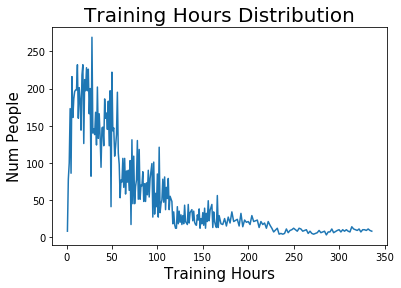

In [49]:
# plt.plot(trh['training_hours'], trh['count'])
# plt.title("Training Hours Distribution", fontsize=20)
# plt.xlabel('Training Hours', fontsize=15)
# plt.ylabel('Num People', fontsize=15)
# # plt.ylim(0, 3000)
# plt.show()

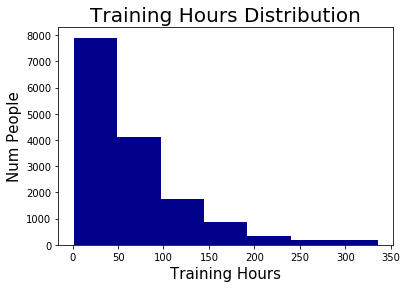

In [50]:
plt.hist(train['training_hours'], bins=7, color='darkblue')
plt.title("Training Hours Distribution", fontsize=20)
plt.xlabel('Training Hours', fontsize=15)
plt.ylabel('Num People', fontsize=15)
# plt.grid()
plt.show()

### target (0-not looking, 1-looking)

In [51]:
tar = train['target'].value_counts(dropna=False)
tar

0    11501
1     3825
Name: target, dtype: int64

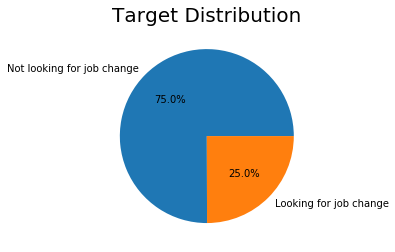

In [52]:
plt.pie(tar, labels=['Not looking for job change','Looking for job change'], autopct='%1.1f%%')
plt.title("Target Distribution", fontsize=20)
plt.show()

# Part 2

## pre-processing

In [53]:
# checking if there is more than one sample per person (duplications) - there isn't!
enrid = train['enrollee_id'].value_counts(dropna=False).to_frame()
enrid.reset_index(inplace=True) 
enrid.rename(columns = {list(enrid)[0]: 'enrollee_id', list(enrid)[1]: 'count'}, inplace = True)
enrid
check = enrid[enrid['count'] > 1]
check

,enrollee_id,count


### handling nulls

#### gender

In [54]:
new_train = train.copy()
new_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1
5,3759,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,2,18,0
6,23234,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,29,0
7,32330,city_84,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,13,50-99,Pvt Ltd,>4,122,1
8,22965,city_139,0.487,Male,Has relevent experience,no_enrollment,Masters,STEM,19,NaN,NaN,1,52,1
9,28416,city_160,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,10,NaN,NaN,2,41,0


In [55]:
new_train['gender'].fillna('Unknown', inplace=True)

#### enrolled_university

In [56]:
new_train['enrolled_university'].fillna('no_enrollment', inplace=True)

In [57]:
new_train['enrolled_university'].value_counts()

no_enrollment       11347
Full time course     3026
Part time course      953
Name: enrolled_university, dtype: int64

#### education_level

In [58]:
new_train[new_train['education_level'].notnull() == False]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,never,24,0
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,NaN,NaN,>20,NaN,NaN,never,154,0
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,never,92,0
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,NaN,NaN,20,100-500,Pvt Ltd,>4,20,0
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,NaN,NaN,<1,NaN,NaN,never,62,0
331,6254,city_103,0.920,Male,No relevent experience,no_enrollment,NaN,NaN,5,NaN,NaN,never,94,0
377,6297,city_134,0.698,Unknown,Has relevent experience,no_enrollment,NaN,NaN,4,NaN,NaN,never,20,0
381,17955,city_100,0.887,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,never,262,0
392,12873,city_103,0.920,Unknown,No relevent experience,no_enrollment,NaN,NaN,1,NaN,NaN,never,10,0
394,20752,city_136,0.897,Male,No relevent experience,Part time course,NaN,NaN,2,10000+,Pvt Ltd,1,26,0


In [59]:
edc_list = np.array_split(new_train[new_train['education_level'].notnull() == False], 5)

In [60]:
edc_list[0]['education_level'].fillna("Phd", inplace=True)
edc_list[1]['education_level'].fillna("Masters", inplace=True)
edc_list[2]['education_level'].fillna("Graduate", inplace=True)
edc_list[3]['education_level'].fillna("High School", inplace=True)
edc_list[4]['education_level'].fillna("Primary School", inplace=True)

In [61]:
result = pd.concat(edc_list)
result

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,24,0
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,Phd,NaN,>20,NaN,NaN,never,154,0
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,92,0
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,Phd,NaN,20,100-500,Pvt Ltd,>4,20,0
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,NaN,<1,NaN,NaN,never,62,0
331,6254,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,NaN,5,NaN,NaN,never,94,0
377,6297,city_134,0.698,Unknown,Has relevent experience,no_enrollment,Phd,NaN,4,NaN,NaN,never,20,0
381,17955,city_100,0.887,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,262,0
392,12873,city_103,0.920,Unknown,No relevent experience,no_enrollment,Phd,NaN,1,NaN,NaN,never,10,0
394,20752,city_136,0.897,Male,No relevent experience,Part time course,Phd,NaN,2,10000+,Pvt Ltd,1,26,0


In [62]:
frames = [result, new_train[new_train['education_level'].notnull() == True]]
temp = pd.concat(frames)
temp

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,24,0
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,Phd,NaN,>20,NaN,NaN,never,154,0
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,92,0
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,Phd,NaN,20,100-500,Pvt Ltd,>4,20,0
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,NaN,<1,NaN,NaN,never,62,0
331,6254,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,NaN,5,NaN,NaN,never,94,0
377,6297,city_134,0.698,Unknown,Has relevent experience,no_enrollment,Phd,NaN,4,NaN,NaN,never,20,0
381,17955,city_100,0.887,Male,No relevent experience,no_enrollment,Phd,NaN,3,NaN,NaN,never,262,0
392,12873,city_103,0.920,Unknown,No relevent experience,no_enrollment,Phd,NaN,1,NaN,NaN,never,10,0
394,20752,city_136,0.897,Male,No relevent experience,Part time course,Phd,NaN,2,10000+,Pvt Ltd,1,26,0


In [63]:
temp['education_level'].value_counts(dropna=False)

Graduate          9379
Masters           3558
High School       1664
Phd                397
Primary School     328
Name: education_level, dtype: int64

In [64]:
new_train = temp

#### major_discipline

In [65]:
new_train['major_discipline'].fillna('STEM', inplace=True)

In [66]:
new_train['major_discipline'].value_counts()

STEM               13849
Humanities           527
Other                295
Business Degree      273
Arts                 204
No Major             178
Name: major_discipline, dtype: int64

#### company_size & company_type

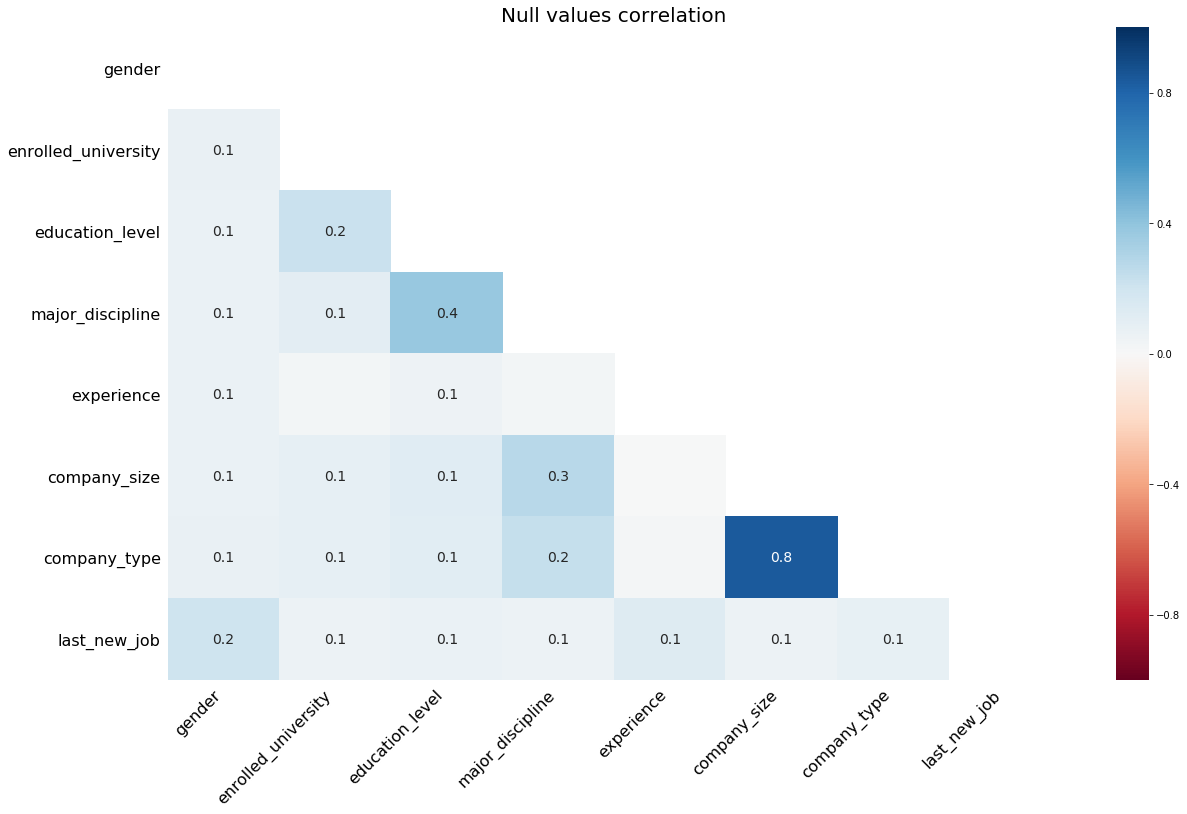

In [67]:
# Null values correlation chart
msno.heatmap(train)
plt.title("Null values correlation", fontsize=20)
plt.show()

In [68]:
# find the most popular type for each size
train[['company_size', 'company_type']]
comp_size_type = train.fillna("NaN").groupby(['company_size', 'company_type']).size().reset_index(name='counts')
comp_size_type.sort_values(['company_size', 'counts'], ascending=False, inplace=True)
comp_size_type
# Pvt Ltd for all

,company_size,company_type,counts
53,NaN,NaN,4319
56,NaN,Pvt Ltd,324
55,NaN,Public Sector,100
52,NaN,NGO,21
51,NaN,Funded Startup,6
54,NaN,Other,6
50,NaN,Early Stage Startup,3
49,<10,Pvt Ltd,577
43,<10,Early Stage Startup,232
44,<10,Funded Startup,112


In [69]:
# find the most popular size for each type
train[['company_size', 'company_type']]
comp_type_size = train.fillna("NaN").groupby(['company_type', 'company_size']).size().reset_index(name='counts')
comp_type_size.sort_values(['company_type', 'counts'], ascending=False, inplace=True)
comp_type_size
# Pvt Ltd - 50-99
# Public Sector - 1000-4999
# Other - 100-500
# NGO - 100-500
# Funded Startup - 50-99
# Early Stage Startup - <10

,company_type,company_size,counts
52,Pvt Ltd,50-99,1731
49,Pvt Ltd,100-500,1469
51,Pvt Ltd,10000+,1398
50,Pvt Ltd,1000-4999,833
48,Pvt Ltd,10-49,706
55,Pvt Ltd,<10,577
53,Pvt Ltd,500-999,495
54,Pvt Ltd,5000-9999,335
56,Pvt Ltd,NaN,324
41,Public Sector,1000-4999,127


In [70]:
# populate the popular size for each type
new_train.loc[(new_train.company_type == 'Pvt Ltd') & (new_train.company_size.notnull() == False),'company_size']='50-99'
new_train.loc[(new_train.company_type == 'Public Sector') & (new_train.company_size.notnull() == False),'company_size']='1000-4999'
new_train.loc[(new_train.company_type == 'Other') & (new_train.company_size.notnull() == False),'company_size']='100-500'
new_train.loc[(new_train.company_type == 'NGO') & (new_train.company_size.notnull() == False),'company_size']='100-500'
new_train.loc[(new_train.company_type == 'Funded Startup') & (new_train.company_size.notnull() == False),'company_size']='50-99'
new_train.loc[(new_train.company_type == 'Early Stage Startup') & (new_train.company_size.notnull() == False),'company_size']='<10'

In [71]:
# populate the popular type for each size
new_train.loc[(new_train.company_size.notnull() == True) & (new_train.company_type.notnull() == False),'company_type']='Pvt Ltd'

In [72]:
# check
new_train.fillna("NaN").groupby(['company_size', 'company_type']).size().reset_index(name='counts')

,company_size,company_type,counts
0,10-49,Early Stage Startup,148
1,10-49,Funded Startup,147
2,10-49,NGO,18
3,10-49,Other,8
4,10-49,Public Sector,34
5,10-49,Pvt Ltd,787
6,100-500,Early Stage Startup,20
7,100-500,Funded Startup,169
8,100-500,NGO,156
9,100-500,Other,21


In [73]:
# fill the rest as Unknown
new_train['company_type'].fillna("Unknown", inplace=True)
new_train['company_size'].fillna("Unknown", inplace=True)

In [74]:
# check
new_train.fillna("NaN").groupby(['company_size', 'company_type']).size().reset_index(name='counts')

,company_size,company_type,counts
0,10-49,Early Stage Startup,148
1,10-49,Funded Startup,147
2,10-49,NGO,18
3,10-49,Other,8
4,10-49,Public Sector,34
5,10-49,Pvt Ltd,787
6,100-500,Early Stage Startup,20
7,100-500,Funded Startup,169
8,100-500,NGO,156
9,100-500,Other,21


#### last_new_job

In [76]:
new_train['last_new_job'].fillna(1, inplace=True)

In [78]:
new_train['last_new_job'].value_counts(dropna=False)

1        6819
>4       2612
2        2303
never    1960
4         824
3         808
Name: last_new_job, dtype: int64

### continuous variable to a categorical variable

#### city_development_index

In [83]:
bins = pd.cut(new_train["city_development_index"], 10)
bins

2        (0.899, 0.949]
52       (0.899, 0.949]
108      (0.899, 0.949]
189      (0.899, 0.949]
248      (0.849, 0.899]
331      (0.899, 0.949]
377      (0.648, 0.698]
381      (0.849, 0.899]
392      (0.899, 0.949]
394      (0.849, 0.899]
411      (0.899, 0.949]
425      (0.899, 0.949]
487      (0.799, 0.849]
522      (0.548, 0.598]
584      (0.799, 0.849]
630      (0.598, 0.648]
633      (0.849, 0.899]
642      (0.648, 0.698]
660      (0.899, 0.949]
673      (0.498, 0.548]
677      (0.899, 0.949]
751      (0.749, 0.799]
778      (0.899, 0.949]
817      (0.899, 0.949]
841      (0.648, 0.698]
860      (0.899, 0.949]
861      (0.849, 0.899]
880      (0.849, 0.899]
994      (0.899, 0.949]
1001     (0.899, 0.949]
              ...      
15295    (0.598, 0.648]
15296    (0.899, 0.949]
15297    (0.648, 0.698]
15298    (0.899, 0.949]
15299    (0.899, 0.949]
15301    (0.648, 0.698]
15302    (0.598, 0.648]
15303    (0.648, 0.698]
15304    (0.648, 0.698]
15305    (0.899, 0.949]
15306    (0.648,

In [84]:
bins.value_counts()

(0.899, 0.949]    7851
(0.598, 0.648]    2167
(0.849, 0.899]    1916
(0.648, 0.698]     890
(0.799, 0.849]     793
(0.749, 0.799]     786
(0.548, 0.598]     437
(0.698, 0.749]     340
(0.498, 0.548]      93
(0.447, 0.498]      53
Name: city_development_index, dtype: int64

In [87]:
new_train = pd.merge(new_train, bins, left_index=True, right_index=True, suffixes=("", "_bucket"))
new_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_bucket
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,Phd,STEM,3,Unknown,Unknown,never,24,0,"(0.899, 0.949]"
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,Phd,STEM,>20,Unknown,Unknown,never,154,0,"(0.899, 0.949]"
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,3,Unknown,Unknown,never,92,0,"(0.899, 0.949]"
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,20,100-500,Pvt Ltd,>4,20,0,"(0.899, 0.949]"
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,STEM,<1,Unknown,Unknown,never,62,0,"(0.849, 0.899]"


In [99]:
new_train[['enrollee_id','city','city_development_index','city_development_index_bucket','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours','target']]

,enrollee_id,city,city_development_index,city_development_index_bucket,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
2,604,city_16,0.910,"(0.899, 0.949]",Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,24,0
52,16543,city_114,0.926,"(0.899, 0.949]",Other,Has relevent experience,no_enrollment,Phd,STEM,21.0,Unknown,Unknown,never,154,0
108,11326,city_103,0.920,"(0.899, 0.949]",Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,92,0
189,19108,city_160,0.920,"(0.899, 0.949]",Male,Has relevent experience,no_enrollment,Phd,STEM,20.0,100-500,Pvt Ltd,>4,20,0
248,15126,city_67,0.855,"(0.849, 0.899]",Male,No relevent experience,no_enrollment,Phd,STEM,0.5,Unknown,Unknown,never,62,0
331,6254,city_103,0.920,"(0.899, 0.949]",Male,No relevent experience,no_enrollment,Phd,STEM,5.0,Unknown,Unknown,never,94,0
377,6297,city_134,0.698,"(0.648, 0.698]",Unknown,Has relevent experience,no_enrollment,Phd,STEM,4.0,Unknown,Unknown,never,20,0
381,17955,city_100,0.887,"(0.849, 0.899]",Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,262,0
392,12873,city_103,0.920,"(0.899, 0.949]",Unknown,No relevent experience,no_enrollment,Phd,STEM,1.0,Unknown,Unknown,never,10,0
394,20752,city_136,0.897,"(0.849, 0.899]",Male,No relevent experience,Part time course,Phd,STEM,2.0,10000+,Pvt Ltd,1,26,0


#### experience

In [95]:
def experience_buckets(x):
    if x == 0:
        return "no_experience"
    elif x <= 3:
        return "0-3"
    elif x <= 10:
        return "4-10"
    else:
        return "11+"

new_train['experience'].replace(">20", 21, inplace=True)
new_train['experience'].replace("<1", 0.5, inplace=True)

new_train['experience_bucket'] = new_train['experience'].apply(experience_buckets)
new_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_bucket,experience_bucket
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,24,0,"(0.899, 0.949]",0-3
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,Phd,STEM,21.0,Unknown,Unknown,never,154,0,"(0.899, 0.949]",11+
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,92,0,"(0.899, 0.949]",0-3
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,20.0,100-500,Pvt Ltd,>4,20,0,"(0.899, 0.949]",11+
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,STEM,0.5,Unknown,Unknown,never,62,0,"(0.849, 0.899]",0-3
331,6254,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,5.0,Unknown,Unknown,never,94,0,"(0.899, 0.949]",4-10
377,6297,city_134,0.698,Unknown,Has relevent experience,no_enrollment,Phd,STEM,4.0,Unknown,Unknown,never,20,0,"(0.648, 0.698]",4-10
381,17955,city_100,0.887,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,262,0,"(0.849, 0.899]",0-3
392,12873,city_103,0.920,Unknown,No relevent experience,no_enrollment,Phd,STEM,1.0,Unknown,Unknown,never,10,0,"(0.899, 0.949]",0-3
394,20752,city_136,0.897,Male,No relevent experience,Part time course,Phd,STEM,2.0,10000+,Pvt Ltd,1,26,0,"(0.849, 0.899]",0-3


#### training_hours

In [96]:
def training_hours_buckets(x):
    if x <= 100:
        return "0-100"
    elif x <= 200:
        return "101-200"
    else:
        return "201+"

new_train['training_hours_bucket'] = new_train['training_hours'].apply(training_hours_buckets)
new_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_bucket,experience_bucket,training_hours_bucket
2,604,city_16,0.910,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,24,0,"(0.899, 0.949]",0-3,0-100
52,16543,city_114,0.926,Other,Has relevent experience,no_enrollment,Phd,STEM,21.0,Unknown,Unknown,never,154,0,"(0.899, 0.949]",11+,101-200
108,11326,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,92,0,"(0.899, 0.949]",0-3,0-100
189,19108,city_160,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,20.0,100-500,Pvt Ltd,>4,20,0,"(0.899, 0.949]",11+,0-100
248,15126,city_67,0.855,Male,No relevent experience,no_enrollment,Phd,STEM,0.5,Unknown,Unknown,never,62,0,"(0.849, 0.899]",0-3,0-100
331,6254,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,5.0,Unknown,Unknown,never,94,0,"(0.899, 0.949]",4-10,0-100
377,6297,city_134,0.698,Unknown,Has relevent experience,no_enrollment,Phd,STEM,4.0,Unknown,Unknown,never,20,0,"(0.648, 0.698]",4-10,0-100
381,17955,city_100,0.887,Male,No relevent experience,no_enrollment,Phd,STEM,3.0,Unknown,Unknown,never,262,0,"(0.849, 0.899]",0-3,201+
392,12873,city_103,0.920,Unknown,No relevent experience,no_enrollment,Phd,STEM,1.0,Unknown,Unknown,never,10,0,"(0.899, 0.949]",0-3,0-100
394,20752,city_136,0.897,Male,No relevent experience,Part time course,Phd,STEM,2.0,10000+,Pvt Ltd,1,26,0,"(0.849, 0.899]",0-3,0-100


### feature extraction

#### city_development_index

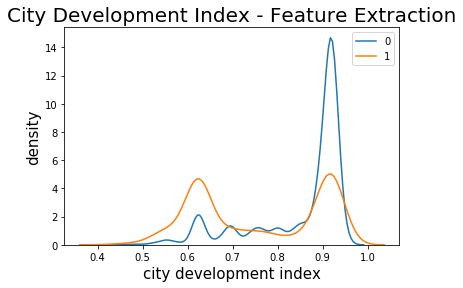

In [188]:
sns.distplot(new_train[new_train['target'] == 0]['city_development_index'], hist=False, kde=True, label='0')
sns.distplot(new_train[new_train['target'] == 1]['city_development_index'], hist=False, kde=True, label='1')
plt.legend()
plt.title("City Development Index - Feature Extraction", fontsize=20)
plt.xlabel('city development index', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

#### training_hours

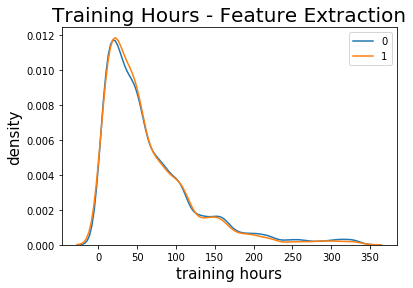

In [189]:
sns.distplot(new_train[new_train['target'] == 0]['training_hours'], hist=False, kde=True, label='0')
sns.distplot(new_train[new_train['target'] == 1]['training_hours'], hist=False, kde=True, label='1')
plt.legend()
plt.title("Training Hours - Feature Extraction", fontsize=20)
plt.xlabel('training hours', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

#### experience

C:\Users\Mirit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Mirit\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


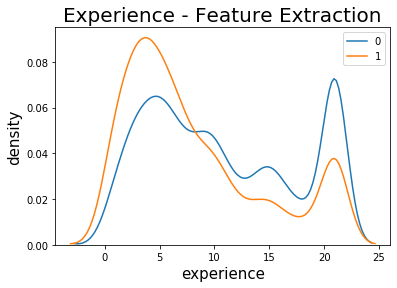

In [190]:
sns.distplot(new_train[new_train['target'] == 0]['experience'], hist=False, kde=True, label='0')
sns.distplot(new_train[new_train['target'] == 1]['experience'], hist=False, kde=True, label='1')
plt.legend()
plt.title("Experience - Feature Extraction", fontsize=20)
plt.xlabel('experience', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.show()

#### gender

In [121]:
# df.plot(x="Word", y=["Percentage1", "Percentage2"], kind="bar")
new_train[new_train['target'] == 0]['gender'].value_counts()

Male       8152
Unknown    2510
Female      730
Other       109
Name: gender, dtype: int64

In [125]:
new_train[new_train['target'] == 1]['gender'].value_counts()

Male       2398
Unknown    1129
Female      257
Other        41
Name: gender, dtype: int64

#### major_discipline

In [128]:
new_train[new_train['target'] == 0]['major_discipline'].value_counts()

STEM               10364
Humanities           414
Other                218
Business Degree      205
Arts                 162
No Major             138
Name: major_discipline, dtype: int64

In [129]:
new_train[new_train['target'] == 1]['major_discipline'].value_counts()

STEM               3485
Humanities          113
Other                77
Business Degree      68
Arts                 42
No Major             40
Name: major_discipline, dtype: int64

#### education_level

In [131]:
new_train[new_train['target'] == 0]['education_level'].value_counts()

Graduate          6761
Masters           2786
High School       1353
Phd                331
Primary School     270
Name: education_level, dtype: int64

In [130]:
new_train[new_train['target'] == 1]['education_level'].value_counts()

Graduate          2618
Masters            772
High School        311
Phd                 66
Primary School      58
Name: education_level, dtype: int64

#### company_size

In [132]:
new_train[new_train['target'] == 0]['company_size'].value_counts()

Unknown      2526
50-99        2285
100-500      1730
10000+       1308
1000-4999     967
<10           870
10-49         858
500-999       579
5000-9999     378
Name: company_size, dtype: int64

In [133]:
new_train[new_train['target'] == 1]['company_size'].value_counts()

Unknown      1793
50-99         504
100-500       350
10000+        305
10-49         284
1000-4999     207
<10           178
500-999       121
5000-9999      83
Name: company_size, dtype: int64

In [147]:
# 0
copm_new_0 = new_train[new_train['target'] == 0]['company_size'].value_counts(dropna=False).to_frame()
copm_new_0.reset_index(inplace=True) 
copm_new_0.rename(columns = {list(copm_new_0)[0]: 'company_size', list(copm_new_0)[1]: 'count_0'}, inplace = True)
copm_new_0['ratio'] = copm_new_0['count_0']/copm_new_0['count_0'].sum()
copm_new_0

,company_size,count_0,ratio
0,Unknown,2526,0.219633
1,50-99,2285,0.198678
2,100-500,1730,0.150422
3,10000+,1308,0.113729
4,1000-4999,967,0.084080
5,<10,870,0.075646
6,10-49,858,0.074602
7,500-999,579,0.050343
8,5000-9999,378,0.032867


In [146]:
# 1
copm_new_1 = new_train[new_train['target'] == 1]['company_size'].value_counts(dropna=False).to_frame()
copm_new_1.reset_index(inplace=True) 
copm_new_1.rename(columns = {list(copm_new_1)[0]: 'company_size', list(copm_new_1)[1]: 'count_1'}, inplace = True)
copm_new_1['ratio'] = copm_new_1['count_1']/copm_new_1['count_1'].sum()
copm_new_1

,company_size,count_1,ratio
0,Unknown,1793,0.468758
1,50-99,504,0.131765
2,100-500,350,0.091503
3,10000+,305,0.079739
4,10-49,284,0.074248
5,1000-4999,207,0.054118
6,<10,178,0.046536
7,500-999,121,0.031634
8,5000-9999,83,0.021699


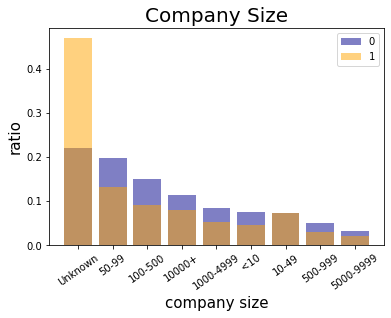

In [192]:
plt.bar(x=copm_new_0['company_size'], height=copm_new_0['ratio'], alpha=0.5, color='darkblue', label='0')
plt.bar(x=copm_new_1['company_size'], height=copm_new_1['ratio'], alpha=0.5, color='orange', label='1')
plt.title("Company Size", fontsize=20)
plt.xlabel('Company Size', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.xticks(rotation=35)
plt.legend()
plt.xlabel('company size', fontsize=15)
plt.ylabel('ratio', fontsize=15)
# plt.ylim(0, 10000)
plt.show()

#### company_type

In [150]:
new_train[new_train['target'] == 0]['company_type'].value_counts()

Pvt Ltd                6936
Unknown                2526
Funded Startup          679
Public Sector           586
Early Stage Startup     384
NGO                     316
Other                    74
Name: company_type, dtype: int64

In [151]:
new_train[new_train['target'] == 1]['company_type'].value_counts()

Unknown                1793
Pvt Ltd                1556
Public Sector           164
Early Stage Startup     110
Funded Startup          100
NGO                      76
Other                    26
Name: company_type, dtype: int64

In [166]:
# 0
copmt_new_0 = new_train[new_train['target'] == 0]['company_type'].value_counts(dropna=False).to_frame()
copmt_new_0.reset_index(inplace=True) 
copmt_new_0.rename(columns = {list(copmt_new_0)[0]: 'company_type', list(copmt_new_0)[1]: 'count_0'}, inplace = True)
copmt_new_0['ratio'] = copmt_new_0['count_0']/copmt_new_0['count_0'].sum()
copmt_new_0.sort_values(['company_type'], inplace=True, ascending=False)
copmt_new_0

,company_type,count_0,ratio
1,Unknown,2526,0.219633
0,Pvt Ltd,6936,0.603078
3,Public Sector,586,0.050952
6,Other,74,0.006434
5,NGO,316,0.027476
2,Funded Startup,679,0.059038
4,Early Stage Startup,384,0.033388


In [165]:
# 1
copmt_new_1 = new_train[new_train['target'] == 1]['company_type'].value_counts(dropna=False).to_frame()
copmt_new_1.reset_index(inplace=True) 
copmt_new_1.rename(columns = {list(copmt_new_1)[0]: 'company_type', list(copmt_new_1)[1]: 'count_1'}, inplace = True)
copmt_new_1['ratio'] = copmt_new_1['count_1']/copmt_new_1['count_1'].sum()
copmt_new_1.sort_values(['company_type'], inplace=True, ascending=False)
copmt_new_1

,company_type,count_1,ratio
0,Unknown,1793,0.468758
1,Pvt Ltd,1556,0.406797
2,Public Sector,164,0.042876
6,Other,26,0.006797
5,NGO,76,0.019869
4,Funded Startup,100,0.026144
3,Early Stage Startup,110,0.028758


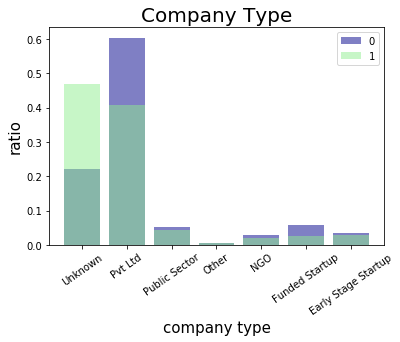

In [194]:
plt.bar(x=copmt_new_0['company_type'], height=copmt_new_0['ratio'], alpha=0.5, color='darkblue', label='0')
# plt.plot(copmt_new_0['company_type'], copmt_new_0['ratio'], color='darkblue')
plt.bar(x=copmt_new_1['company_type'], height=copmt_new_1['ratio'], alpha=0.5, color='lightgreen', label='1')
# plt.plot(copmt_new_1['company_type'], copmt_new_1['ratio'], color='lightgreen')
plt.title("Company Type", fontsize=20)
plt.xlabel('Company Type', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.xticks(rotation=35)
# plt.ylim(0, 10000)
plt.legend()
plt.xlabel('company type', fontsize=15)
plt.ylabel('ratio', fontsize=15)
plt.show()

#### relevent_experience

In [184]:
r0 = new_train[new_train['target'] == 0]['relevent_experience'].value_counts().to_frame()
r0.reset_index(inplace=True) 
r0.rename(columns = {list(r0)[0]: 'relevent_experience', list(r0)[1]: 'count_0'}, inplace = True)
r0['ratio'] = r0['count_0']/r0['count_0'].sum()
r0

,relevent_experience,count_0,ratio
0,Has relevent experience,8682,0.754891
1,No relevent experience,2819,0.245109


In [185]:
r1 = new_train[new_train['target'] == 1]['relevent_experience'].value_counts().to_frame()
r1.reset_index(inplace=True) 
r1.rename(columns = {list(r1)[0]: 'relevent_experience', list(r1)[1]: 'count_1'}, inplace = True)
r1['ratio'] = r1['count_1']/r1['count_1'].sum()
r1

,relevent_experience,count_1,ratio
0,Has relevent experience,2382,0.622745
1,No relevent experience,1443,0.377255
